In [1]:
#import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
#import data
logins = pd.read_json('logins.json')

#explore data
print(logins.head())
print(' ')
print(logins.info())
print(' ')
print(logins.describe())

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None
 
                 login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38


In [3]:
#reorder logins chronologically and reindex
logins.sort_values('login_time')
logins.reset_index(drop=True)

#divide into 15 minute windows
range_15 = pd.date_range('1970-01-01 20:00:00', '1970-04-13 19:00:00', freq='15T')
logins_15 = pd.Series(np.zeros(len(range_15)), index=range_15)

In [4]:
#catagorize login times by 15 minute window
p = 0 
for i in range(len(logins)):
    start = logins_15.index[p]
    end = logins_15.index[p+1]
    t = logins['login_time'][i]
    
    if start < t < end:
        logins_15[p] = logins_15[p] + 1
    else:
        #move to next 15 minute slot
        while (end < t): 
            p = p + 1 
            start = logins_15.index[p] 
            end = logins_15.index[p+1]
        logins_15[p] = logins_15[p] + 1

print(logins_15.head(10))
print(logins_15.shape)

1970-01-01 20:00:00     1.0
1970-01-01 20:15:00     6.0
1970-01-01 20:30:00     2.0
1970-01-01 20:45:00    15.0
1970-01-01 21:00:00     0.0
1970-01-01 21:15:00     5.0
1970-01-01 21:30:00     0.0
1970-01-01 21:45:00     3.0
1970-01-01 22:00:00     9.0
1970-01-01 22:15:00     9.0
Freq: 15T, dtype: float64
(9789,)


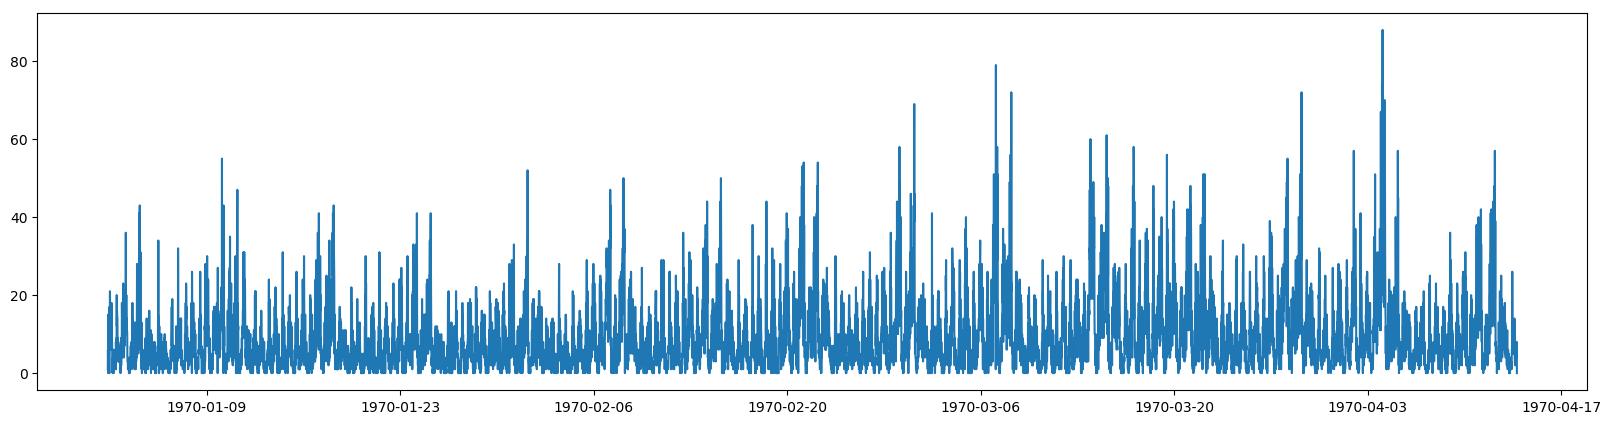

In [5]:
#plot the counts per 15 minute window
plt.figure(figsize=(20,5), dpi=100)
plt.plot(logins_15.index,logins_15)
plt.show()


In [6]:
#create dataframe
df = pd.DataFrame(logins_15)
df.columns=['count']
df['day_of_week'] = df.index.map(lambda x: x.dayofweek)


In [7]:
#find the average login for days of the week.
weekdays = df.groupby('day_of_week').mean()
weekdays

,count
day_of_week,
0,6.216749
1,6.898065
2,7.639881
3,8.814706
4,10.520833
5,13.506250
6,12.626389


In [8]:
#rename rows with the corresponding day of the week
weekdays.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays


,count
Monday,6.216749
Tuesday,6.898065
Wednesday,7.639881
Thursday,8.814706
Friday,10.520833
Saturday,13.506250
Sunday,12.626389


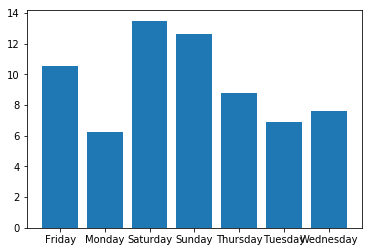

In [9]:
#plot frequency for days of the week
plt.bar(weekdays.index, weekdays['count'])
plt.show()

In [10]:
#divide login times by hour
df['hour']= df.index.map(lambda x: x.hour)
df.head()

,count,day_of_week,hour
1970-01-01 20:00:00,1.0,3,20
1970-01-01 20:15:00,6.0,3,20
1970-01-01 20:30:00,2.0,3,20
1970-01-01 20:45:00,15.0,3,20
1970-01-01 21:00:00,0.0,3,21


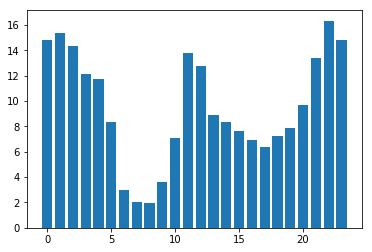

,count,day_of_week
hour,,
0,14.821078,3.029412
1,15.370098,3.029412
2,14.303922,3.029412
3,12.149510,3.029412
4,11.759804,3.029412


In [11]:
#plot by hour.
hours = df.groupby('hour').mean()

plt.bar(hours.index, hours['count'])
plt.show()
hours.head()

# part 2

### 1.)  What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Without much more information I would monitor the stops each driving partner makes during their shift.  It would be an easy item to measure since stops should already be recorded for billing purposes.  If drivers pass a certain threshold of stop made in both cities, I would consider it a success.

### 2.)  Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
### a. how you will implement the experiment
### b. what statistical test(s) you will conduct to verify the significance of the observation
### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

a) The experiment would be something that would already be trackable now.  All we need is the records from the billing department.  Once a baseline is found using past results, we can watch to see how the new policy effects where drivers will stop.  
b) A t-test will be used to see if the results from the new data were a significant deviation from the past results.
c) Depending on the results of the t-test, I would either recommend for the program to continue or I would tell them that the policy is not working and to find another way.

# Part 3

In [12]:
import os

files = [f for f in os.listdir('.') if os.path.isfile(f)]
files

['logins.json',
 'Ultimate_Challenge.ipynb',
 'ultimate_data_challenge.json',
 'ultimate_data_science_challenge.pdf']

In [13]:
import json
with open('ultimate_data_challenge.json') as f:
   data = json.load(f)
ultimate = pd.DataFrame(data)

print(ultimate.info())
print('')
print(ultimate.describe())
print('')
print(ultimate.shape)
ultimate.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None

           avg_dist  avg_rating_by_driver  avg_rating_of_driver     avg_surge  \
count  50000.000000          49799.000000          41878.000000  50000.000000   
mean       5.796827              4.778158              4.601559      1.07

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0


In [14]:
#drop all rows with null values.
ultimate = ultimate.dropna()
ultimate.info()
ultimate.reset_index(inplace=True)
print()
print('Percentage of the data that was retained after cleaning: ',41445/50000*100)

ultimate.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB

Percentage of the data that was retained after cleaning:  82.89


,index,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4
5,5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0
6,7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0
7,8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0
8,10,4.28,4.9,5.0,1.00,Winterfell,2014-05-30,iPhone,2014-01-13,0.0,1,True,100.0
9,11,3.81,5.0,4.0,1.00,Winterfell,2014-01-10,iPhone,2014-01-06,0.0,3,False,100.0


In [15]:
#convert to datetime objs
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'])
ultimate['signup_date'] = pd.to_datetime(ultimate['signup_date'])
ultimate['retention'] = ''

#measure retention in days
def day_counter(num):
    y = ultimate['last_trip_date'][num]-ultimate['signup_date'][num]
    return y
ultimate['retention'] = ultimate.index.map(lambda x: day_counter(x))

#develop target variable
ultimate['target'] = ultimate['retention'] >= datetime.timedelta(days=180)


In [16]:
#find unique values of phone and city
print(ultimate.phone.unique())
print(ultimate.city.unique())


['iPhone' 'Android']
["King's Landing" 'Astapor' 'Winterfell']


In [17]:
#add dummy variables
city = pd.get_dummies(ultimate.city)
ultimate = ultimate.join(city)

ultimate['Android'] = ultimate.phone == 'Android'

ultimate.head()

,index,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retention,target,Astapor,King's Landing,Winterfell,Android
0,0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143 days,False,0,1,0,False
1,1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96 days,False,1,0,0,True
2,2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1 days,False,1,0,0,False
3,3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170 days,False,0,1,0,False
4,4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47 days,False,0,0,1,True


In [18]:
#import machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.utils import resample


#initialize variables for models
X = ultimate.drop(['index', 'city', 'last_trip_date', 'phone', 'signup_date', 'retention', 'target'], axis=1)
y = ultimate.target

ultimate['target'].value_counts()


False    41364
True        81
Name: target, dtype: int64

Very imbalanced dataset.  Must rebalance for testing

In [19]:
#separate training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

#separate out true and false rows.
training = X_train
training['target'] = y_train
sample_true = training[training.target == True]
sample_false = training[training.target == False]

#resample the true values and recombine with the training data
sample_true = resample(sample_true, replace=True, n_samples=sample_false.shape[0], random_state=20)
resampled = pd.concat([sample_true,sample_false])

#reassign to X_train and y_train
X_train = resampled.drop(['target'], axis=1)
y_train = resampled.target

C:\Users\JustinD\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
#attempting logistic regression
model = LogisticRegression(random_state=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [21]:
#Checking to see how well the model worked

print('R-squared score: ',model.score(X_test, y_test))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

R-squared score:  0.582941247436
Confusion Matrix: 
[[4817 3452]
 [   5   15]]

             precision    recall  f1-score   support

      False       1.00      0.58      0.74      8269
       True       0.00      0.75      0.01        20

avg / total       1.00      0.58      0.73      8289



In [22]:
from sklearn.svm import LinearSVC

model2 = LinearSVC(random_state=20)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)


In [23]:
#Checking to see how well the model worked

print('R-squared score: ',model2.score(X_test, y_test))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred2))
print()
print(classification_report(y_test, y_pred2))

R-squared score:  0.23597538907
Confusion Matrix: 
[[1937 6332]
 [   1   19]]

             precision    recall  f1-score   support

      False       1.00      0.23      0.38      8269
       True       0.00      0.95      0.01        20

avg / total       1.00      0.24      0.38      8289



In [24]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier(n_neighbors=2)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)


In [25]:
#Checking to see how well the model worked

print('R-squared score: ',model3.score(X_test, y_test))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred3))
print()
print(classification_report(y_test, y_pred3))

R-squared score:  0.996260103752
Confusion Matrix: 
[[8257   12]
 [  19    1]]

             precision    recall  f1-score   support

      False       1.00      1.00      1.00      8269
       True       0.08      0.05      0.06        20

avg / total       1.00      1.00      1.00      8289



In [26]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(max_depth=5, random_state=20)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

In [27]:
print('R-squared score: ',model4.score(X_test, y_test))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred4))
print()
print(classification_report(y_test, y_pred4))

R-squared score:  0.821208830981
Confusion Matrix: 
[[6794 1475]
 [   7   13]]

             precision    recall  f1-score   support

      False       1.00      0.82      0.90      8269
       True       0.01      0.65      0.02        20

avg / total       1.00      0.82      0.90      8289



Of the four models tested, the random forest model appears to do the best. Although the logistic regression and Linear SVC did the best categorizing the true values correctly, they failed to adequately categorize the false values correctly. The k-nearest-neighbor classifier categorized almost all points as false and only predicted one true value accurately. Changing the values for n did not change this. The random forest classifier did the best at balancing both precision and recall